<h2>About Dataset</h2>

<n>This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory: longitude; latitude; housing_median_age; total_rooms; total_bedrooms; population; households; median_income; median_house_value; ocean_proximity;
</n>

<h3>Packages</h3>

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Exploration</h2>

In [2]:
data = pd.read_csv('\databases-python\housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<b>About this file</b>

<n>
<b>1. longitude:</b> A measure of how far west a house is; a higher value is farther west
<br>
<b>2. latitude:</b> A measure of how far north a house is; a higher value is farther north
<br>
<b>3. housingMedianAge:</b> Median age of a house within a block; a lower number is a newer building
<br>
<b>4. totalRooms:</b> Total number of rooms within a block
<br>
<b>5. totalBedrooms:</b> Total number of bedrooms within a block
<br>
<b>6. population:</b> Total number of people residing within a block
<br>
<b>7. households:</b> Total number of households, a group of people residing within a home unit, for a block
<br>
<b>8. medianIncome:</b> Median income for households within a block of houses (measured in tens of thousands of US Dollars)
<br>
<b>9. medianHouseValue:</b> Median house value for households within a block (measured in US Dollars)
<br>
<b>10. oceanProximity:</b> Location of the house w.r.t ocean/sea
</n>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#droping missing values
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<h3>Training Data Test Split</h3>

In [7]:
from sklearn.model_selection import train_test_split

#defining x and y axis
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
#20% of the data will be reserved for evaluating
#we're not going to touch this data before we're confident to launch the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20508,-121.51,38.58,42.0,1822.0,636.0,1372.0,560.0,1.2542,INLAND,76000.0
15877,-122.41,37.75,52.0,1892.0,415.0,1442.0,371.0,4.2891,NEAR BAY,230000.0
17979,-121.95,37.32,33.0,726.0,168.0,351.0,147.0,3.1458,<1H OCEAN,270500.0
8555,-118.40,33.92,25.0,1453.0,271.0,695.0,283.0,5.9499,<1H OCEAN,345800.0
17014,-122.29,37.52,33.0,4104.0,751.0,1837.0,771.0,5.3506,NEAR OCEAN,388100.0
...,...,...,...,...,...,...,...,...,...,...
14651,-117.15,32.81,34.0,1629.0,318.0,900.0,282.0,3.1458,NEAR OCEAN,178300.0
16410,-121.23,37.94,20.0,268.0,78.0,77.0,49.0,1.1250,INLAND,150000.0
15149,-116.90,32.90,19.0,3090.0,552.0,1621.0,520.0,4.0806,<1H OCEAN,189200.0
8360,-118.34,33.97,45.0,2230.0,364.0,949.0,344.0,5.5000,<1H OCEAN,188200.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019686C14648>,
      dtype=object)

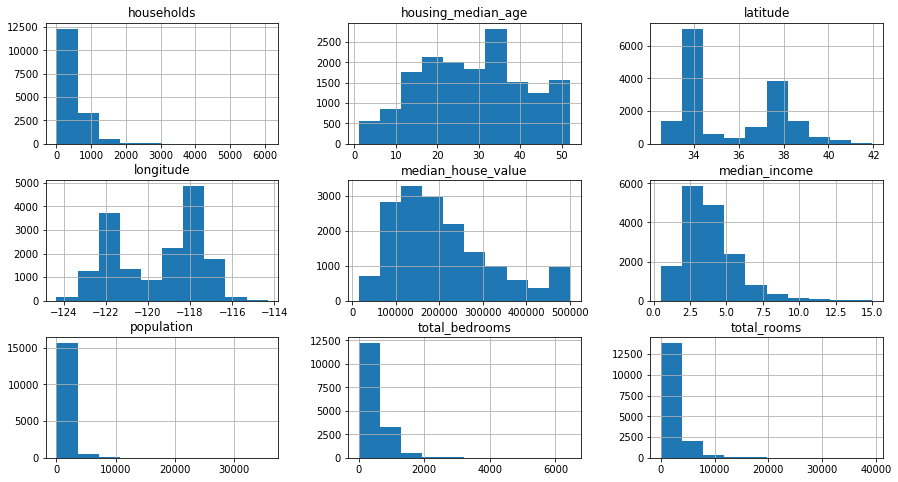

In [11]:
train_data.hist(figsize=(15,8))

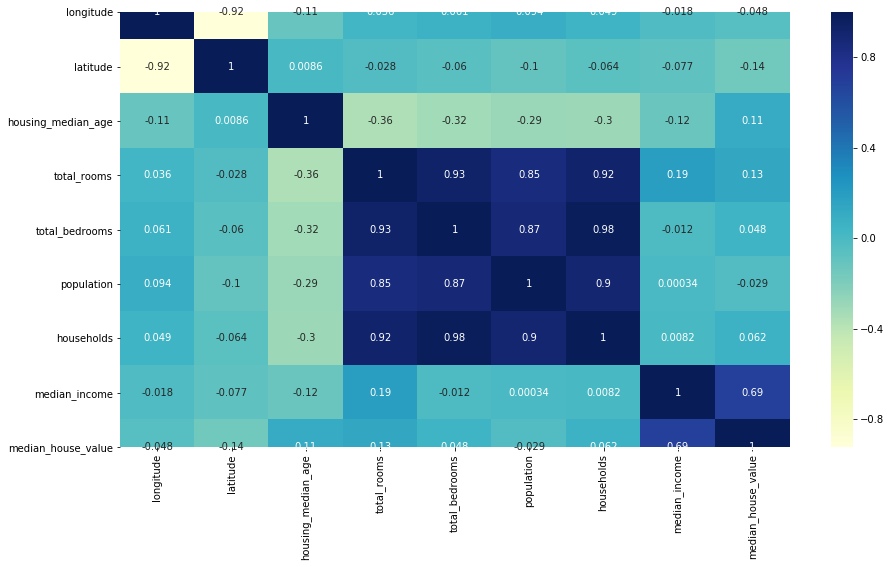

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<h2>Data Pre-Processing</h2>

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

<h3>Feature Engineering</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019692466D88>,
      dtype=object)

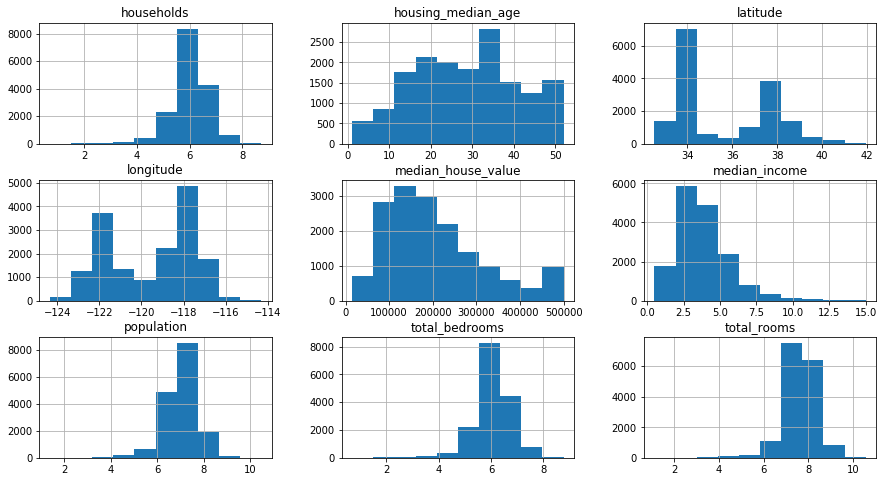

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
#ocean proximity feature
train_data.ocean_proximity.value_counts()

<1H OCEAN     7166
INLAND        5180
NEAR OCEAN    2122
NEAR BAY      1874
ISLAND           4
Name: ocean_proximity, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20508,-121.51,38.58,42.0,7.508239,6.456770,7.224753,6.329721,1.2542,76000.0,0,1,0,0,0
15877,-122.41,37.75,52.0,7.545918,6.030685,7.274480,5.918894,4.2891,230000.0,0,0,0,1,0
17979,-121.95,37.32,33.0,6.588926,5.129899,5.863631,4.997212,3.1458,270500.0,1,0,0,0,0
8555,-118.40,33.92,25.0,7.282074,5.605802,6.545350,5.648974,5.9499,345800.0,1,0,0,0,0
17014,-122.29,37.52,33.0,8.319961,6.622736,7.516433,6.648985,5.3506,388100.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,-117.15,32.81,34.0,7.396335,5.765191,6.803505,5.645447,3.1458,178300.0,0,0,0,0,1
16410,-121.23,37.94,20.0,5.594711,4.369448,4.356709,3.912023,1.1250,150000.0,0,1,0,0,0
15149,-116.90,32.90,19.0,8.036250,6.315358,7.391415,6.255750,4.0806,189200.0,1,0,0,0,0
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,188200.0,1,0,0,0,0


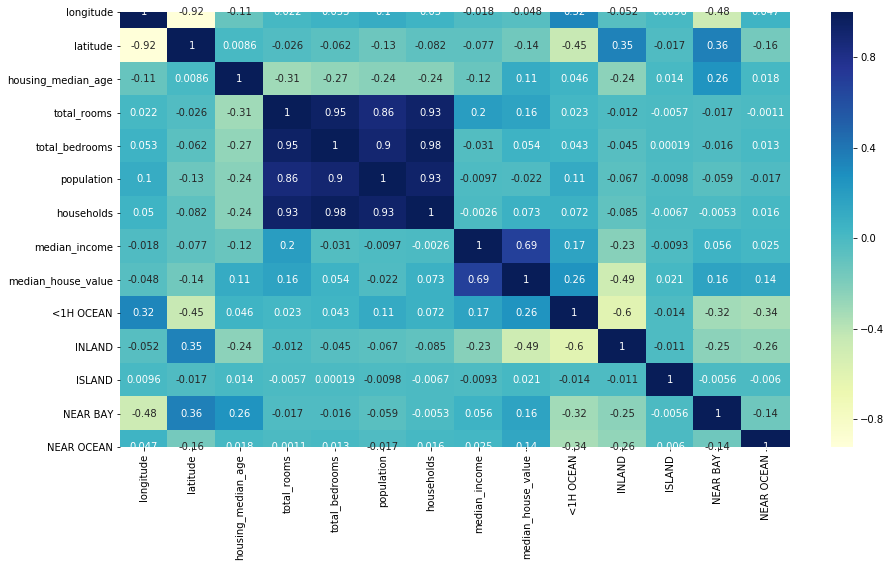

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

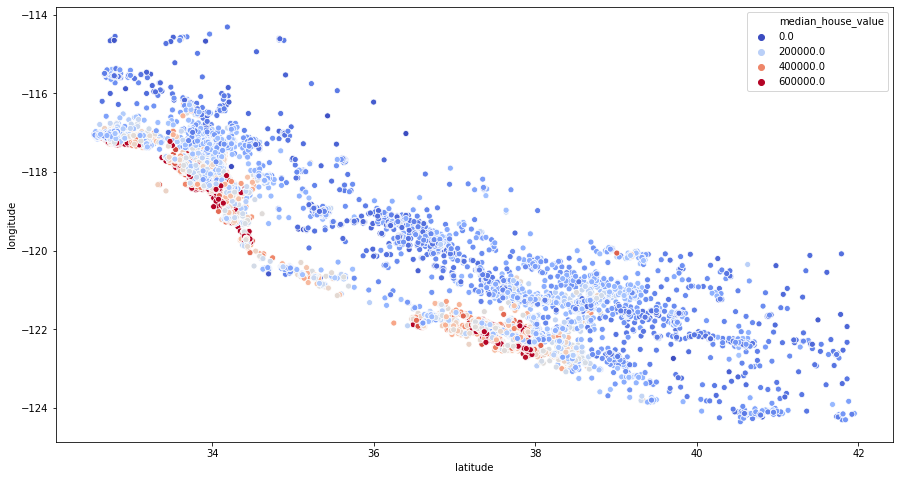

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

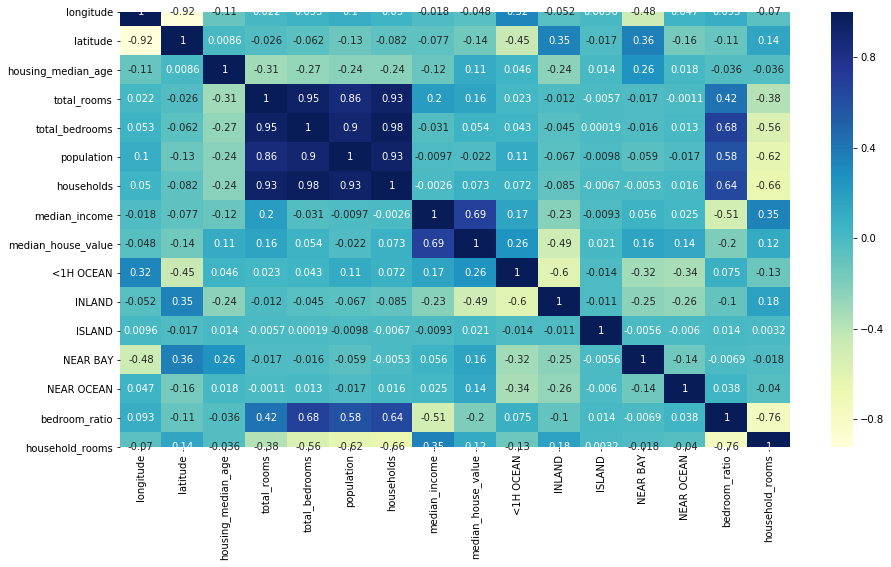

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<h2>Modelling</h2>

<h3>Linear Regrassion Model</h3>

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#necessary to split data on more time
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [25]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [26]:
X_test_s = scaler.transform(X_test)

In [27]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
446,-122.29,37.87,52.0,6.797940,5.293305,5.958425,5.323010,3.8750,182600.0,0,0,0,1,0,0.778663,1.277086
17449,-120.46,34.74,15.0,7.689829,5.958425,6.719013,5.820083,5.3765,223100.0,0,0,0,0,1,0.774845,1.321258
19984,-119.33,36.19,27.0,6.037871,5.099866,5.808142,4.955827,1.0714,63800.0,0,1,0,0,0,0.844646,1.218338
12525,-121.48,38.56,46.0,7.297768,5.843544,6.535241,5.869297,2.7316,134700.0,0,1,0,0,0,0.800730,1.243380
8721,-118.36,33.83,36.0,7.415175,5.707110,6.850126,5.707110,5.1984,353600.0,1,0,0,0,0,0.769653,1.299287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,-119.56,36.51,9.0,8.258681,6.697034,7.676937,6.647688,2.5033,70100.0,0,1,0,0,0,0.810908,1.242339
11896,-117.36,33.98,33.0,7.635787,6.152733,7.524021,6.148468,2.4667,80700.0,0,1,0,0,0,0.805776,1.241901
4771,-118.35,34.04,45.0,7.517521,6.131226,7.180070,6.133398,2.5625,138000.0,1,0,0,0,0,0.815592,1.225670
12138,-117.22,33.87,16.0,4.043051,2.079442,3.688879,2.708050,2.6250,500001.0,0,1,0,0,0,0.514325,1.492975


In [28]:
reg.score(X_test_s, y_test)

0.6753373176168159

<h3>Random Forest Model</h3>

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
forest.score(X_test_s, y_test)

0.8011951802166877

In [40]:
#cross validation

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

#hyperparameters
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 4, 8], 'min

In [41]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8210903495686581